## For Department 


In [1]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
df = pd.read_excel("../Data/gerald_data_processed.xlsx")

In [3]:
columns_to_keep = ['job_id', 'department', 'fraudulent']

processed_df = df.copy()

# Drop columns that are not in the list
processed_df = processed_df[columns_to_keep]

In [4]:
processed_df.head()

,job_id,department,fraudulent
0,1,marketing,0
1,2,success,0
2,3,NaN,0
3,4,sales,0
4,5,NaN,0


In [5]:
fraud_df = processed_df[processed_df["fraudulent"]==1]
non_fraud_df = processed_df[processed_df["fraudulent"]==0]

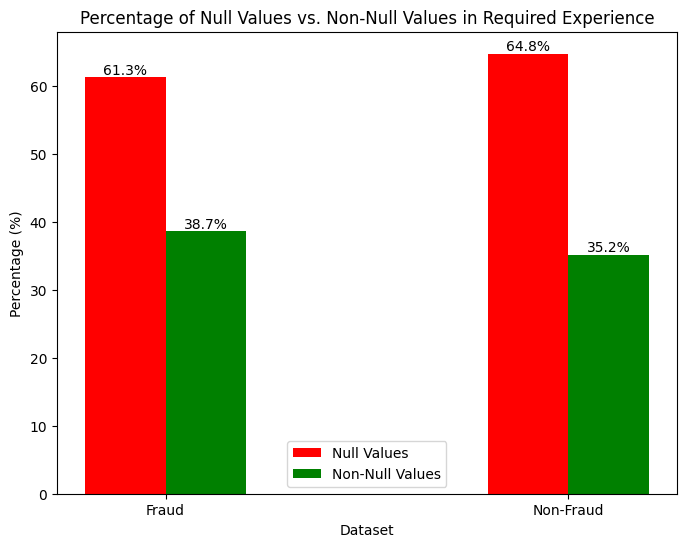

In [6]:
nan_count_fraud = (fraud_df['department'].isna()).sum()
non_nan_count_fraud = (fraud_df['department'].notna()).sum()

nan_count_non_fraud = (non_fraud_df['department'].isna()).sum()
non_nan_count_non_fraud = (non_fraud_df['department'].notna()).sum()

# Calculate percentages
total_count_fraud = len(fraud_df)
nan_percentage_fraud = (nan_count_fraud / total_count_fraud) * 100
non_nan_percentage_fraud = (non_nan_count_fraud / total_count_fraud) * 100

total_count_non_fraud = len(non_fraud_df)
nan_percentage_non_fraud = (nan_count_non_fraud / total_count_non_fraud) * 100
non_nan_percentage_non_fraud = (non_nan_count_non_fraud / total_count_non_fraud) * 100

plt.figure(figsize=(8, 6))
bar_width = 0.2
index = range(2)

bars1 = plt.bar(index, [nan_percentage_fraud, nan_percentage_non_fraud], bar_width, color='red', label='Null Values')
bars2 = plt.bar([i + bar_width for i in index], [non_nan_percentage_fraud, non_nan_percentage_non_fraud], bar_width, color='green', label='Non-Null Values')

plt.xlabel('Dataset')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Null Values vs. Non-Null Values in Required Experience')
plt.xticks([i + bar_width / 2 for i in index], ['Fraud', 'Non-Fraud'])
plt.legend()

# Add percentages on top of the bars
for bar, percentage in zip(bars1 + bars2, [nan_percentage_fraud, nan_percentage_non_fraud, non_nan_percentage_fraud, non_nan_percentage_non_fraud]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

# Word Cloud

In [7]:
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

fraud_df = fraud_df[fraud_df["department"].notna()].astype({"department": str})
non_fraud_df = non_fraud_df[non_fraud_df["department"].notna()].astype({"department": str})

fraud_department_text = ' '.join(fraud_df['department'])
non_fraud_department_text = ' '.join(non_fraud_df['department'])


## Fraud

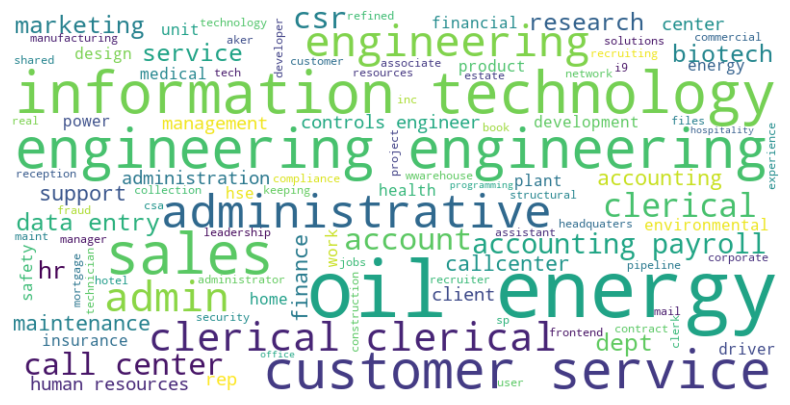

In [8]:
plot_wordcloud(fraud_department_text)

## Non-Fraud

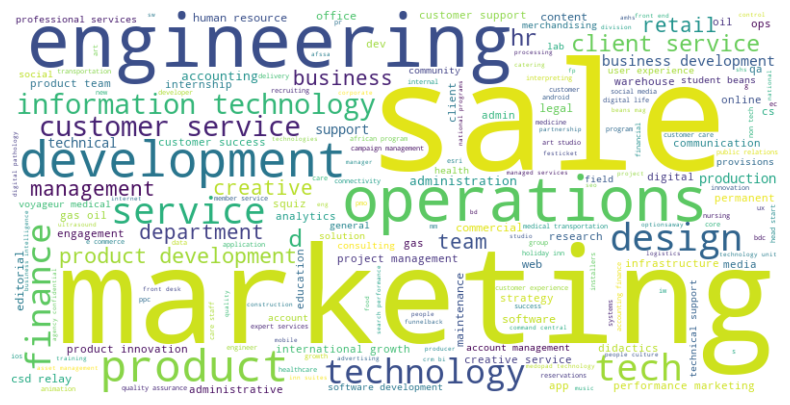

In [9]:
plot_wordcloud(non_fraud_department_text)

## Fuzzy Matching Dept Categories

In [10]:
similarity_threshold = 65

department_categories = {}

# Create a list to store similarity scores
similarity_scores = []

# Function to assign categories based on fuzzy matching and calculate similarity scores
def assign_dept_category(department):
    if pd.isna(department):
        similarity_scores.append(np.nan)  # Assign NaN similarity score
        return np.nan  # Assign NaN if the department is NaN
    
    # Check if the department is already assigned to a category
    if department in department_categories:
        similarity_scores.append(100)  # Assign 100 as similarity score (exact match)
        return department_categories[department]
    
    # Iterate through existing categories
    for category, existing_department in department_categories.items():
        similarity_score = fuzz.ratio(department, existing_department)
        if similarity_score >= similarity_threshold:
            department_categories[department] = existing_department
            similarity_scores.append(similarity_score)
            return existing_department
    
    # If no matching category is found, create a new one
    department_categories[department] = department
    similarity_scores.append(100)  # Assign 100 as similarity score for a new category
    return department


processed_df['dept_category'] = processed_df['department'].apply(assign_dept_category)
processed_df['similarity_score'] = similarity_scores

In [11]:
processed_df['department'].nunique()

1205

In [12]:
processed_df['dept_category'].nunique()

625

In [13]:
processed_df[processed_df["department"].notna()].head(50)

,job_id,department,fraudulent,dept_category,similarity_score
0,1,marketing,0,marketing,100.0
1,2,success,0,success,100.0
3,4,sales,0,sales,100.0
6,7,androidpit,0,androidpit,100.0
11,12,hr,0,hr,100.0
14,15,sales,0,sales,100.0
15,16,sales,0,sales,100.0
16,17,r d,0,r d,100.0
22,23,engagement,0,engagement,100.0
23,24,businessfriend com,0,businessfriend com,100.0
